Agnieszka Wrzos

### Opis zbioru danych
Dane:
- artists.csv - informacje o zbiorze danych
- resized.zip - obrazy 50ciu różnych artystów

Źródło: https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time/data




## Wczytanie bibliotek

In [1]:
# Operacje matematyczne i macierzowe
import numpy as np
from numpy.random import seed

# Manipulacja i analiza danych
import pandas as pd

# Wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# Pasek postępu
from tqdm import tqdm, tqdm_notebook

# Generowanie liczb losowych
import random

# Praca z danymi w formacie JSON
import json

# Operacje na systemie plików i ścieżkach
import os
import shutil

# Podział danych na zbiory treningowe i testowe
from sklearn.model_selection import train_test_split

# TensorFlow i Keras - Tworzenie i trenowanie modeli głębokiego uczenia
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers, applications, optimizers, callbacks
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Ustawienie losowości
np.random.seed(1)
tf.random.set_seed(1)
random.seed(1)

from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Wczytanie danych i EDA

In [2]:
# Wczytanie danych
dane = pd.read_csv('data//artists.csv')

In [3]:
# Wymiary tabeli danych
dane.shape

(50, 8)

In [4]:
dane

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


Wnioski:
Dane zawierają informacje o 50ciu artystach:


Problemy:
- Niezbalansowane dane. Więcej niż 200 obrazów tylko 11 artystów.

# Model 1
## Przygotowanie danych

### Przetwarzanie obrazów, standaryzacja rozmiarów? Normalizacja wartości pikseli?

In [5]:
# Ustawienie ścieżki do danych
data_dir = 'data/images/images'
train_dir = 'data/images/train2'
val_dir = 'data/images/val2'


In [6]:
# Tworzenie folderów dla zbiorów treningowych i walidacyjnych
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Iteracja przez foldery artystów
for artist in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, artist)):
        artist_dir = os.path.join(data_dir, artist)
        images = os.listdir(artist_dir)
        
        # Podział danych w proporcji 80:20
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
        
        # Tworzenie folderów dla artystów w zbiorze treningowym i walidacyjnym
        os.makedirs(os.path.join(train_dir, artist), exist_ok=True)
        os.makedirs(os.path.join(val_dir, artist), exist_ok=True)
        
        # Przenoszenie obrazów do odpowiednich folderów
        for image in train_images:
            shutil.copy(os.path.join(artist_dir, image), os.path.join(train_dir, artist, image))
        for image in val_images:
            shutil.copy(os.path.join(artist_dir, image), os.path.join(val_dir, artist, image))

## Budowa modelu


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Tworzenie ImageDataGenerator bez augmentacji danych
data_gen = ImageDataGenerator(rescale=1./255)

# Wczytywanie danych treningowych
train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Wczytywanie danych walidacyjnych
validation_generator = data_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Sprawdzenie liczby klas
num_classes = len(train_generator.class_indices)
print("Liczba klas:", num_classes)

# Budowanie modelu CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])



Found 6735 images belonging to 50 classes.
Found 1711 images belonging to 50 classes.
Liczba klas: 50


C:\Users\agawr\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Kompilacja modelu
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Trenowanie modelu
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

Epoch 1/25


C:\Users\agawr\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


211/211 ━━━━━━━━━━━━━━━━━━━━ 191s 880ms/step - accuracy: 0.1239 - loss: 3.5939 - val_accuracy: 0.1999 - val_loss: 3.1427
Epoch 2/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 135s 632ms/step - accuracy: 0.2393 - loss: 2.9612 - val_accuracy: 0.2724 - val_loss: 2.7812
Epoch 3/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 133s 621ms/step - accuracy: 0.3261 - loss: 2.5553 - val_accuracy: 0.2940 - val_loss: 2.6644
Epoch 4/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 130s 609ms/step - accuracy: 0.4216 - loss: 2.1934 - val_accuracy: 0.3273 - val_loss: 2.5268
Epoch 5/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 132s 618ms/step - accuracy: 0.5240 - loss: 1.7058 - val_accuracy: 0.3413 - val_loss: 2.6249
Epoch 6/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 131s 611ms/step - accuracy: 0.6687 - loss: 1.1827 - val_accuracy: 0.3296 - val_loss: 3.0396
Epoch 7/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 134s 627ms/step - accuracy: 0.7841 - loss: 0.7595 - val_accuracy: 0.3203 - val_loss: 3.6719
Epoch 8/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 130s 607ms/step - accuracy: 0.8869 - loss: 0.41

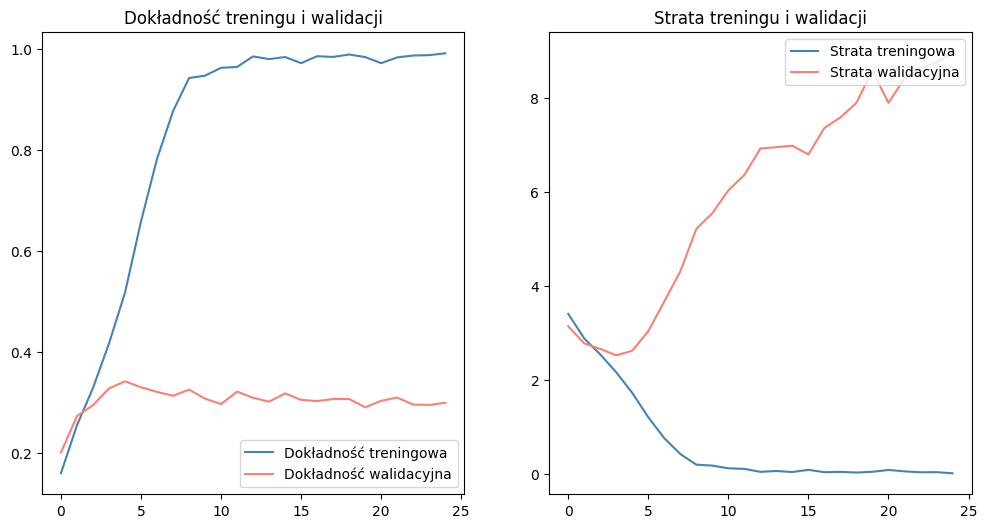

In [12]:
# Wyświetlanie wyników treningu
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Wykres dokładności
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, color='steelblue', label='Dokładność treningowa')  
plt.plot(epochs_range, val_acc, color='salmon', label='Dokładność walidacyjna') 
plt.legend(loc='lower right')
plt.title('Dokładność treningu i walidacji')

# Wykres straty
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, color='steelblue', label='Strata treningowa') 
plt.plot(epochs_range, val_loss, color='salmon', label='Strata walidacyjna')  
plt.legend(loc='upper right')
plt.title('Strata treningu i walidacji')

plt.show()

In [31]:
# Uzyskanie etykiet rzeczywistych
validation_labels = validation_generator.classes

# Przewidywanie na całym zbiorze walidacyjnym
validation_preds = model.predict(validation_generator)

# Uzyskanie indeksów klas dla każdej predykcji
validation_preds = np.argmax(validation_preds, axis=1)

# Generowanie raportu klasyfikacji
report = classification_report(
    validation_labels, 
    validation_preds, 
    target_names=list(validation_generator.class_indices.keys())
)
print(report)

54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 296ms/step
                           precision    recall  f1-score   support

           Albrecht_Dürer       0.04      0.05      0.04        66
            Alfred_Sisley       0.05      0.06      0.05        52
        Amedeo_Modigliani       0.00      0.00      0.00        39
            Andrei_Rublev       0.00      0.00      0.00        20
              Andy_Warhol       0.00      0.00      0.00        37
         Camille_Pissarro       0.00      0.00      0.00        19
               Caravaggio       0.00      0.00      0.00        11
             Claude_Monet       0.00      0.00      0.00        15
             Diego_Rivera       0.00      0.00      0.00        14
          Diego_Velazquez       0.00      0.00      0.00        26
              Edgar_Degas       0.09      0.13      0.11       141
            Edouard_Manet       0.00      0.00      0.00        18
             Edvard_Munch       0.00      0.00      0.00        14
                 El

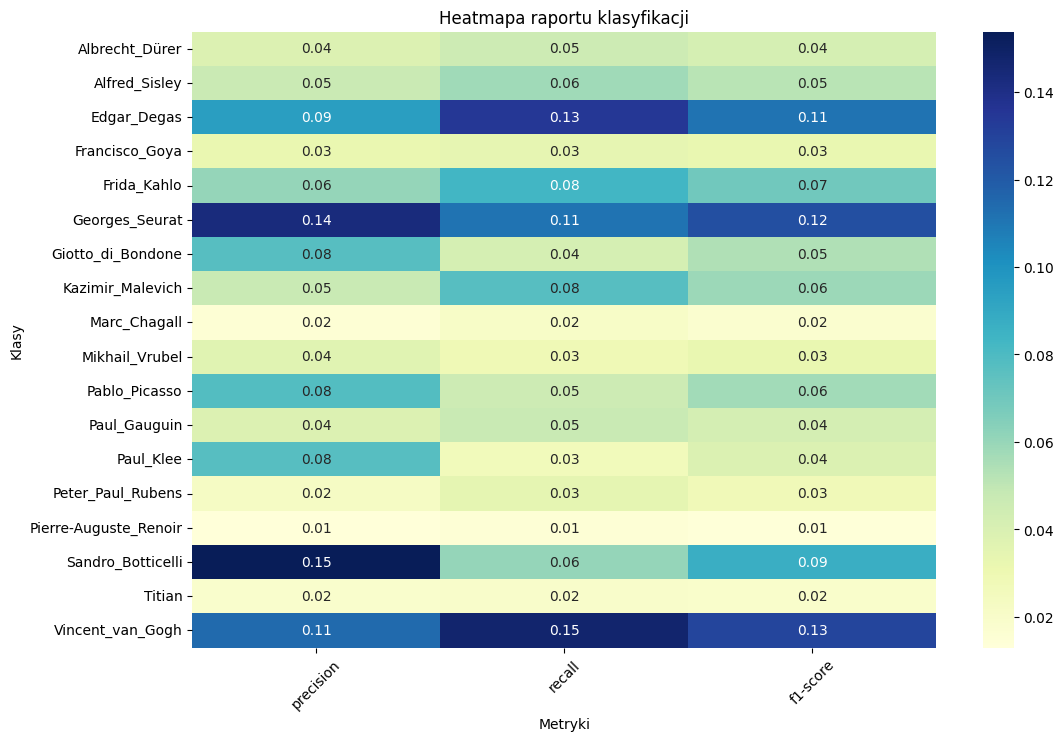

In [32]:
# Generowanie raportu klasyfikacji z output_dict=True
report2 = classification_report(validation_labels, validation_preds, target_names=validation_generator.class_indices.keys(), output_dict=True)

# Przygotowanie danych do heatmapy
report_df = pd.DataFrame(report2).transpose()

# Usunięcie wierszy 'accuracy', 'macro avg' i 'weighted avg'
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Filtrowanie wierszy z zerowymi wartościami w kolumnach precision, recall lub f1-score
report_df = report_df[(report_df[['precision', 'recall', 'f1-score']] > 0).any(axis=1)]

# Wizualizacja heatmapy
plt.figure(figsize=(12, 8))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmapa raportu klasyfikacji')
plt.xlabel('Metryki')
plt.ylabel('Klasy')
plt.xticks(rotation=45)
plt.show()

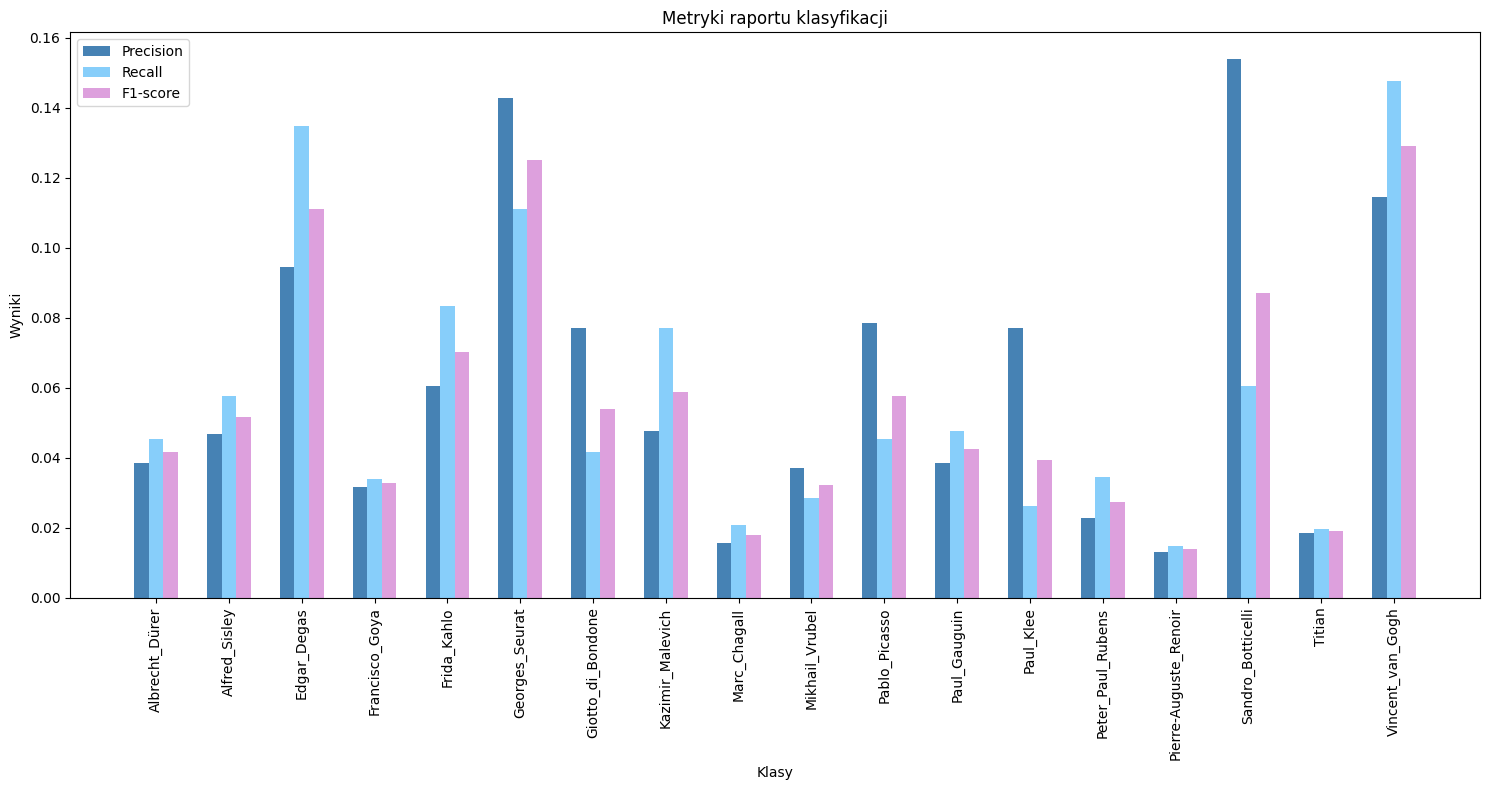

In [33]:
# Obliczanie raportu klasyfikacji
report = classification_report(validation_labels, validation_preds, target_names=validation_generator.class_indices.keys(), output_dict=True)

# Przygotowanie danych do wykresu
classes = list(report.keys())[:-3]  # Wyklucza 'accuracy', 'macro avg', 'weighted avg'
precision = [report[class_]['precision'] for class_ in classes]
recall = [report[class_]['recall'] for class_ in classes]
f1_score = [report[class_]['f1-score'] for class_ in classes]

# Filtrowanie klas z zerowymi wartościami
non_zero_indices = [i for i, p in enumerate(precision) if p > 0 or recall[i] > 0 or f1_score[i] > 0]
filtered_classes = [classes[i] for i in non_zero_indices]
filtered_precision = [precision[i] for i in non_zero_indices]
filtered_recall = [recall[i] for i in non_zero_indices]
filtered_f1_score = [f1_score[i] for i in non_zero_indices]

x = np.arange(len(filtered_classes))  # Lokalizacja klas na osi X
width = 0.2  # Szerokość słupków

fig, ax = plt.subplots(figsize=(15, 8))

# Kolory dla wskaźników
color_precision = '#4682B4'  # Steel Blue
color_recall = '#87CEFA'  # Light Sky Blue
color_f1 = 'plum'  # Fioletowy

bars1 = ax.bar(x - width, filtered_precision, width, label='Precision', color=color_precision)
bars2 = ax.bar(x, filtered_recall, width, label='Recall', color=color_recall)
bars3 = ax.bar(x + width, filtered_f1_score, width, label='F1-score', color=color_f1)

# Dodanie etykiet
ax.set_xlabel('Klasy')
ax.set_ylabel('Wyniki')
ax.set_title('Metryki raportu klasyfikacji')
ax.set_xticks(x)
ax.set_xticklabels(filtered_classes, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step


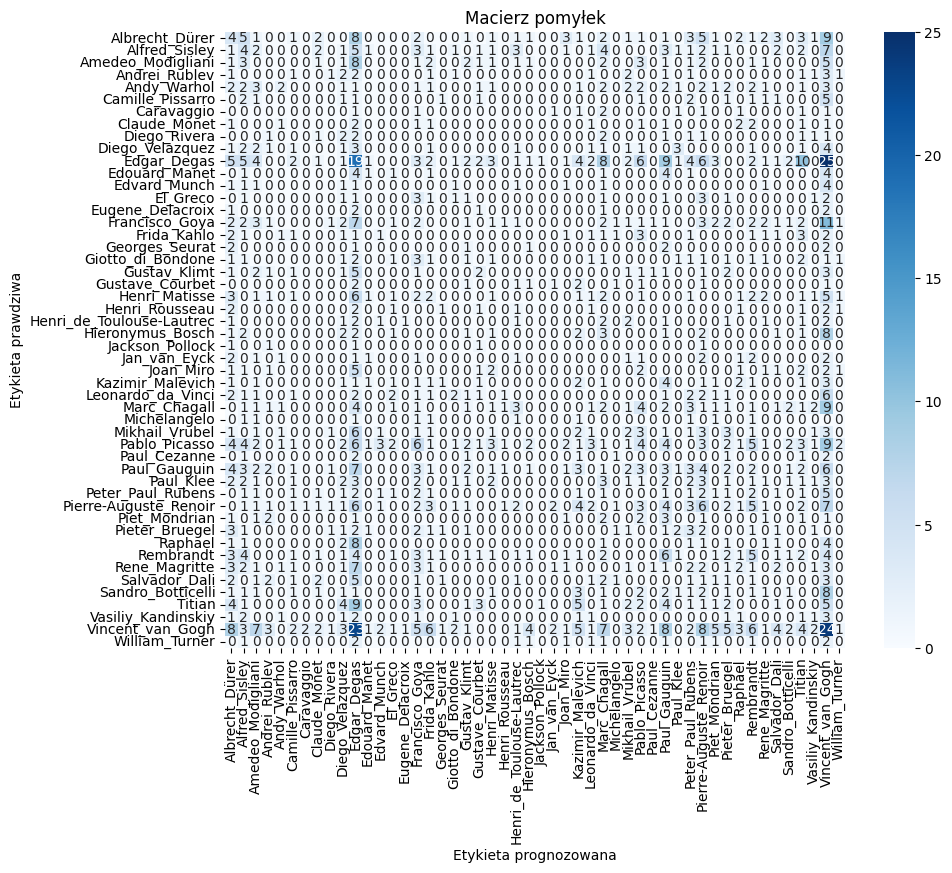

In [34]:
# Pobranie etykiet i prognoz z generatora walidacyjnego
validation_labels = validation_generator.classes
validation_preds = model.predict(validation_generator)
validation_preds = np.argmax(validation_preds, axis=1)

# Obliczenie macierzy pomyłek
cm = confusion_matrix(validation_labels, validation_preds)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Etykieta prognozowana')
plt.ylabel('Etykieta prawdziwa')
plt.title('Macierz pomyłek')
plt.show()


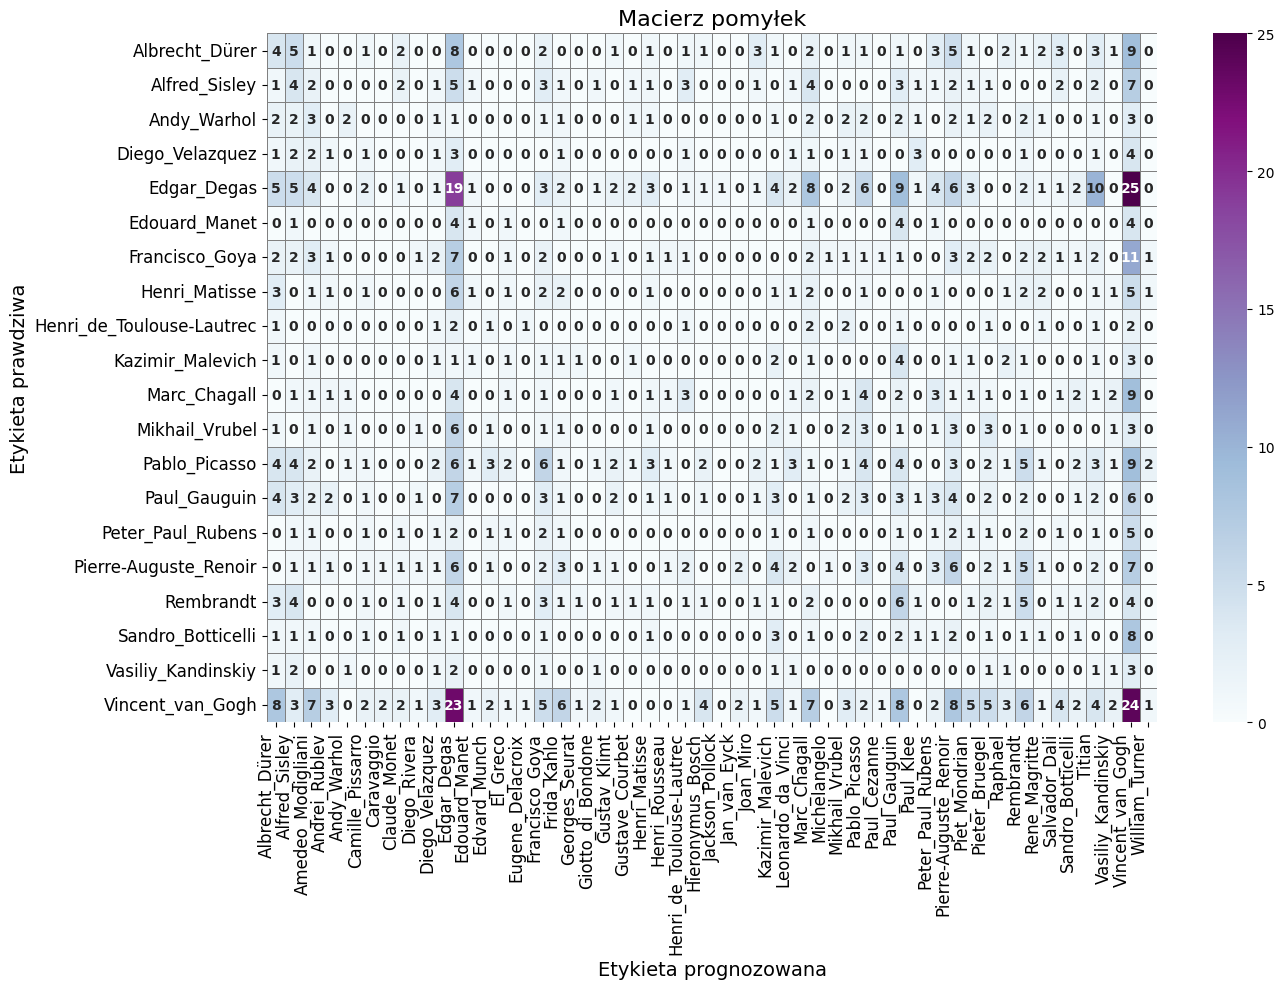

In [35]:
# Generowanie raportu klasyfikacji z zero_division=0, aby obsłużyć nieokreślone metryki
report = classification_report(validation_labels, validation_preds, target_names=validation_generator.class_indices.keys(), output_dict=True, zero_division=0)

# Wykluczenie 'macro avg' i 'weighted avg' z raportu
filtered_report = {cls: metrics for cls, metrics in report.items() if isinstance(metrics, dict)}

# Filtrowanie średnich
filtered_report = {cls: metrics for cls, metrics in filtered_report.items() if cls not in ['macro avg', 'weighted avg']}

# Filtracja klas z precyzją > 0
classes_with_precision = [cls for cls, metrics in filtered_report.items() if metrics['precision'] > 0]

# Wszystkie klasy (oprócz 'macro avg' i 'weighted avg')
all_classes = [cls for cls in validation_generator.class_indices.keys() if cls not in ['macro avg', 'weighted avg']]

# Mapowanie nazw klas na indeksy
class_indices = validation_generator.class_indices

# Upewnij się, że classes_with_precision i all_classes są w class_indices
y_indices = [class_indices[cls] for cls in classes_with_precision if cls in class_indices]
x_indices = [class_indices[cls] for cls in all_classes if cls in class_indices]

# Obliczanie macierzy pomyłek
cm = confusion_matrix(validation_labels, validation_preds, labels=x_indices)

# Filtrowanie macierzy pomyłek, aby uwzględniała tylko istotne wiersze i kolumny
cm_subset = cm[np.ix_(y_indices, x_indices)]

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(14, 10))
ax = sns.heatmap(cm_subset, annot=True, fmt='d', cmap='BuPu', 
                 xticklabels=all_classes,
                 yticklabels=classes_with_precision,
                 cbar=True,
                 annot_kws={"size": 10, "weight": 'bold'},
                 linewidths=0.5,
                 linecolor='gray')

# Dodanie etykiet i tytułu
plt.xlabel('Etykieta prognozowana', fontsize=14)
plt.ylabel('Etykieta prawdziwa', fontsize=14)
plt.title('Macierz pomyłek', fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()


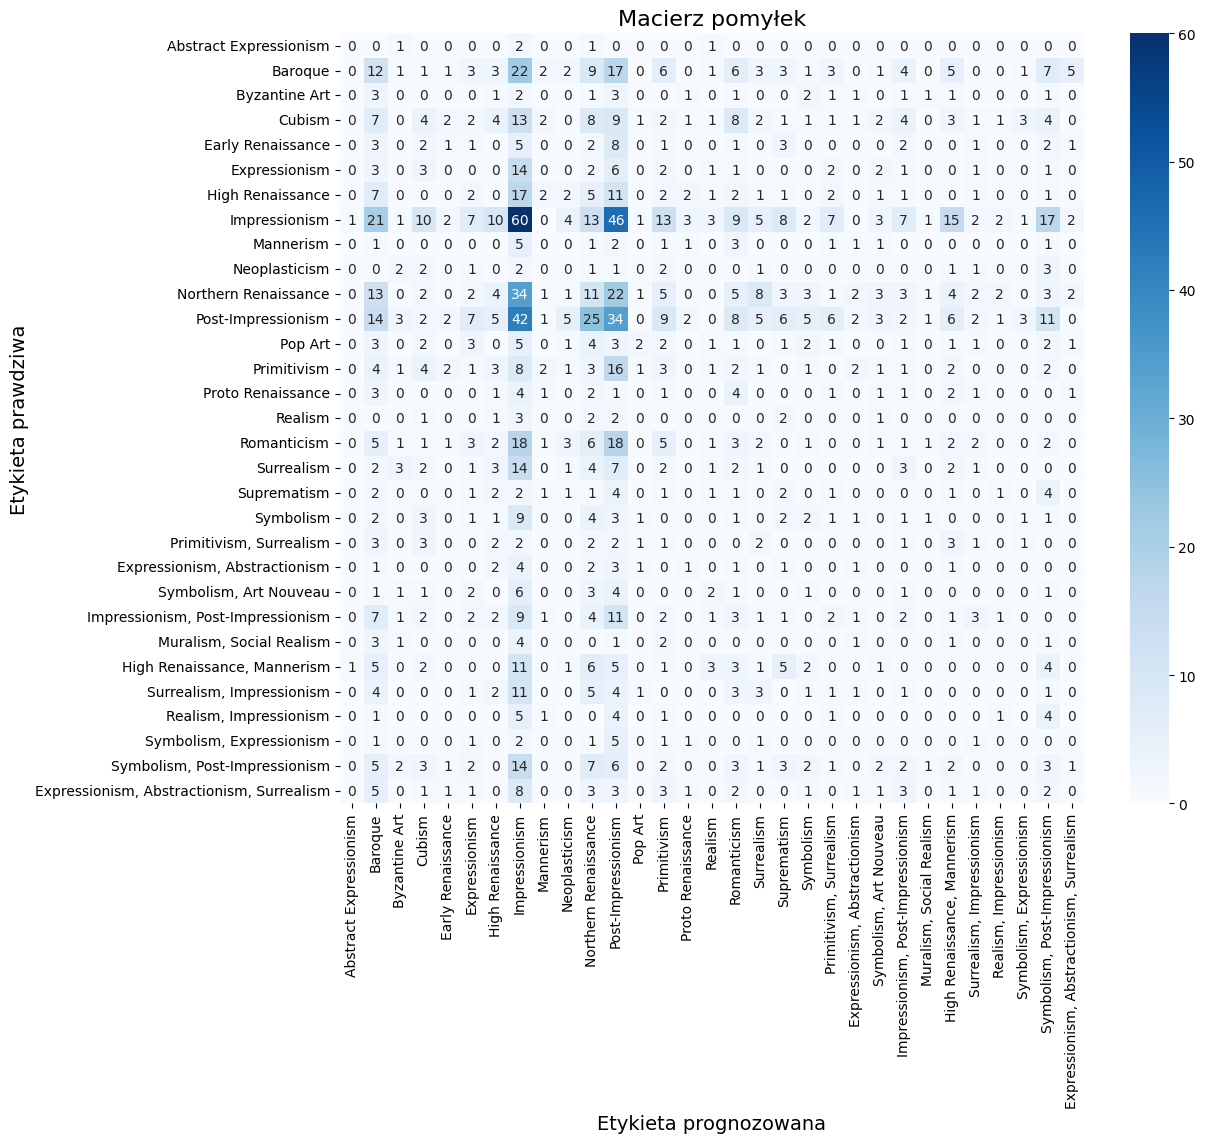

In [36]:
# Define the corrected mapping of artists to their painting styles
style_groups = {
    'Abstract Expressionism': ['Jackson_Pollock'],
    'Baroque': ['Diego_Velazquez','Peter_Paul_Rubens', 'Caravaggio', 'Rembrandt'],
    'Byzantine Art': ['Andrei_Rublev'],
    'Cubism': ['Pablo_Picasso'],
    'Early Renaissance': ['Sandro_Botticelli'],
    'Expressionism': ['Amedeo_Modigliani'],
    'High Renaissance': ['Raphael', 'Leonardo_da_Vinci','Michelangelo'],
    'Impressionism': ['Claude_Monet', 'Pierre-Auguste_Renoir', 'Alfred_Sisley',  'Edgar_Degas'],
    'Mannerism': ['El_Greco'],
    'Neoplasticism': ['Piet_Mondrian'],
    'Northern Renaissance': ['Hieronymus_Bosch', 'Albrecht_Dürer', 'Pieter_Bruegel', 'Jan_van_Eyck'],
    'Post-Impressionism': ['Vincent_van_Gogh', 'Henri_de_Toulouse-Lautrec', 'Paul_Cezanne', 'Georges_Seurat'],
    'Pop Art':['Andy_Warhol'],
    'Primitivism': ['Marc_Chagall', 'Henri_Rousseau'],
    'Proto Renaissance': ['Giotto_di_Bondone'],    
    'Realism': ['Gustave_Courbet'],
    'Romanticism': ['Francisco_Goya', 'William_Turner', 'Eugene_Delacroix'],
    'Surrealism': ['Salvador_Dali', 'Joan_Miro'],
    'Suprematism':['Kazimir_Malevich'],
    'Symbolism': ['Mikhail_Vrubel',],
    
    'Primitivism, Surrealism': ['Frida_Kahlo'],
    'Expressionism, Abstractionism': ['Vasiliy_Kandinskiy'],
    'Symbolism, Art Nouveau': ['Gustav_Klimt'],
    'Impressionism, Post-Impressionism': ['Henri_Matisse', 'Camille_Pissarro'],  
    'Muralism, Social Realism': ['Diego_Rivera'],
    'High Renaissance, Mannerism': ['Titian'],
    'Surrealism, Impressionism':['Rene_Magritte'],
    'Realism, Impressionism':['Edouard_Manet'],
    'Symbolism, Expressionism':['Edvard_Munch'],
    'Symbolism, Post-Impressionism':['Paul_Gauguin'],
    'Expressionism, Abstractionism, Surrealism': ['Paul_Klee']
    
}
artist_names = ['Jackson_Pollock', 'Diego_Velazquez', 'Peter_Paul_Rubens', 'Caravaggio', 'Rembrandt', 'Andrei_Rublev', 'Pablo_Picasso', 'Sandro_Botticelli', 'Amedeo_Modigliani', 'Raphael', 'Leonardo_da_Vinci', 'Michelangelo', 'Claude_Monet', 'Pierre-Auguste_Renoir', 'Alfred_Sisley', 'Edgar_Degas', 'El_Greco', 'Piet_Mondrian', 'Hieronymus_Bosch', 'Albrecht_Dürer', 'Pieter_Bruegel', 'Jan_van_Eyck', 'Vincent_van_Gogh', 'Henri_de_Toulouse-Lautrec', 'Paul_Cezanne', 'Georges_Seurat', 'Andy_Warhol', 'Marc_Chagall', 'Henri_Rousseau', 'Giotto_di_Bondone', 'Gustave_Courbet', 'Francisco_Goya', 'William_Turner', 'Eugene_Delacroix', 'Salvador_Dali', 'Joan_Miro', 'Kazimir_Malevich', 'Mikhail_Vrubel', 'Frida_Kahlo', 'Vasiliy_Kandinskiy', 'Gustav_Klimt', 'Henri_Matisse', 'Camille_Pissarro', 'Diego_Rivera', 'Titian', 'Rene_Magritte', 'Edouard_Manet', 'Edvard_Munch', 'Paul_Gauguin', 'Paul_Klee']

# Create a reverse mapping from artist names to styles
artist_to_style = {artist: style for style, artists in style_groups.items() for artist in artists}

# Check for any artist names in artist_names that are missing in artist_to_style
missing_artists = [artist for artist in artist_names if artist not in artist_to_style]
if missing_artists:
    print("Missing artists in style_groups:", missing_artists)

# Get class labels from the generator
class_indices = validation_generator.class_indices
class_names = list(class_indices.keys())

# Create a reverse mapping from index to artist name
index_to_artist = {index: class_names[index] for index in range(len(class_names))}

# Map validation_labels and validation_preds to their painting styles
validation_labels_styles = [artist_to_style.get(index_to_artist[label], None) for label in validation_labels]
validation_preds_styles = [artist_to_style.get(index_to_artist[pred], None) for pred in validation_preds]

# Filter out None values (for any unmapped cases)
filtered_indices = [(i, j) for i, j in zip(validation_labels, validation_preds) if validation_labels_styles[i] is not None and validation_preds_styles[j] is not None]

# Convert filtered indices to style labels
filtered_labels_styles = [artist_to_style[index_to_artist[i]] for i, _ in filtered_indices]
filtered_preds_styles = [artist_to_style[index_to_artist[j]] for _, j in filtered_indices]

# Define style indices
styles = list(style_groups.keys())  # Exclude 'Unknown'
style_indices = {style: i for i, style in enumerate(styles)}

# Convert style labels to indices
y_indices = [style_indices[style] for style in filtered_labels_styles]
x_indices = [style_indices[style] for style in filtered_preds_styles]

# Calculate confusion matrix for styles
cm = confusion_matrix(y_indices, x_indices, labels=list(style_indices.values()))

# Create style names list for heatmap axes
style_names = [style for style in styles]

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=style_names,
            yticklabels=style_names)
plt.xlabel('Etykieta prognozowana', fontsize=14)
plt.ylabel('Etykieta prawdziwa', fontsize=14)
plt.title('Macierz pomyłek', fontsize=16)
plt.show()